In [2]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import pylab as plb
import csv
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import odr
from scipy.constants import hbar, m_p, e, h
from scipy.stats import sem

plt.style.use('untitled1.txt')

$$\require{mhchem}$$

# Aims

In this part, we want to study the spin-flip transition of nuclei ($\ce{^1 H}$ and $\ce{^{19}F}$) to find the g-factor for each of them 

# Demonstration of NMR spectra of protons in glycerine and polystyrene

## Objective

This first part is just an introduction to how the NMR apparatus works, and identifying the molecular structure of glycerine, polythene, polystyrene and PTFE.

## Experimental method

### Experimental set-up

The aim here is to flip the spin of some nuclei, which have to have an overall spin. As protons and neutrons are spin-$\frac{1}{2}$ fermions, we need to have an *odd* number of nucleons (protons+neutrons), to flip the overall spin.

We place the sample we want to study (which should have at least one nucleus with an overall spin), in an RF coil which is driven by an oscillator in the MHz range. This RF coil is at the centre of a static magnetic field created by a current running through 2 coils in series.

The energy difference between the spin up and spin down (parallel and antiparallel to the magnetic field) is, according to equation (9) in the lab script,

$$E = -g\mu_n B_0$$

where $g$ is the g-factor for the nucleus, $\mu_n$ the nuclear magneton and $B_0$ the static magnetic field. If the energy in the RF coil ($h \nu$, because we're basically looking at photons here), it will be absorbed by the sample and the spin will flip from down to up. The oscillator will load and the voltage will decrease, creating a dip (which will be periodic, as the magnetic field is oscillating).

This feels like I'm repeating myself, as I wrote the set-up for ESR first. However, it is needed here because I want my record to start with the NMR part, as this is what happened chronologically. This reveals the similarities between the two experiments. However, in this experiment, we have an electromagnet (lots of coils of wire wrapped around a bit of soft iron), which will give us a larger magnetic field than the Helmholtz coils. This is needed because $\mu_n < \mu_B$, so the magnetic field for NMR needs to be greater if we want to use the same frequencies to flip the spin of nuclei. 

In this first part, we want to find the resonance dip closest to 18 MHz for each of the elements (glycerine, polystyrene, PTFE and polythene). To do that, we use the display on the oscillator. We want the dips to be equally spaced in the two-channel display and to correspond to when the voltage crosses 0 (which corresponds to the average magnetic field of the electromagnet, $B_0$, as it is modulating). This should look like figure 1, what we see for glycerine.

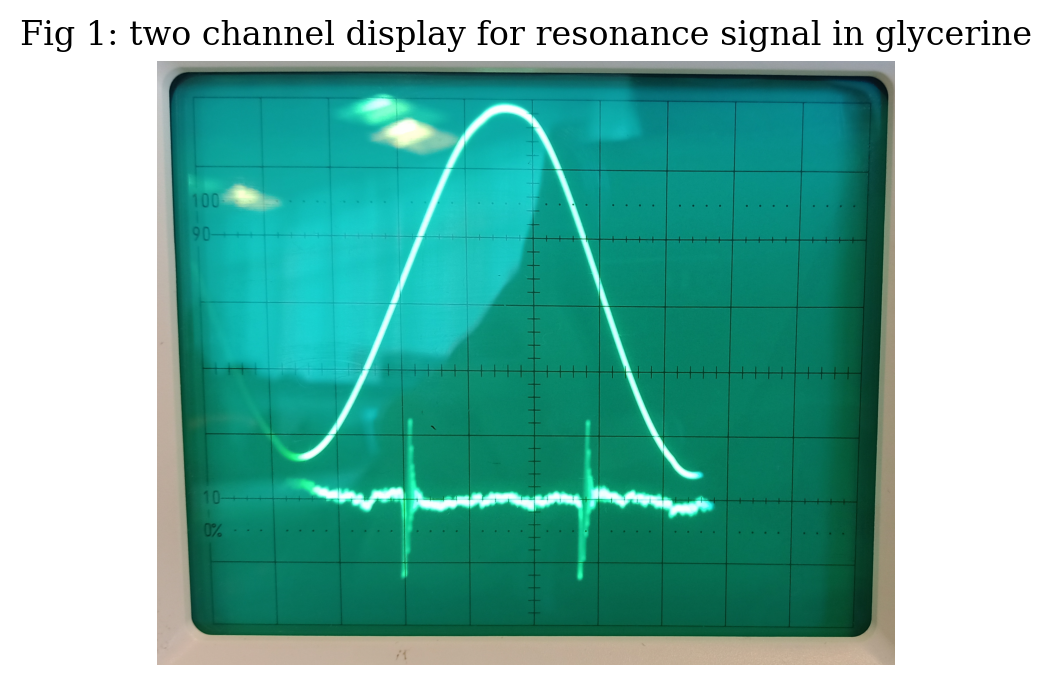

In [3]:
Glycerine_2channels = plt.imread('Glycerine_TwoChannels.png')
plt.figure(figsize=(6,4))  # Sets the size of the displayed image
plt.imshow(Glycerine_2channels)
plt.axis('off')
plt.title('Fig 1: two channel display for resonance signal in glycerine')
plt.show()

We can collapse (overlap) all of these signals by going to the **XY** mode. We get figure 2.

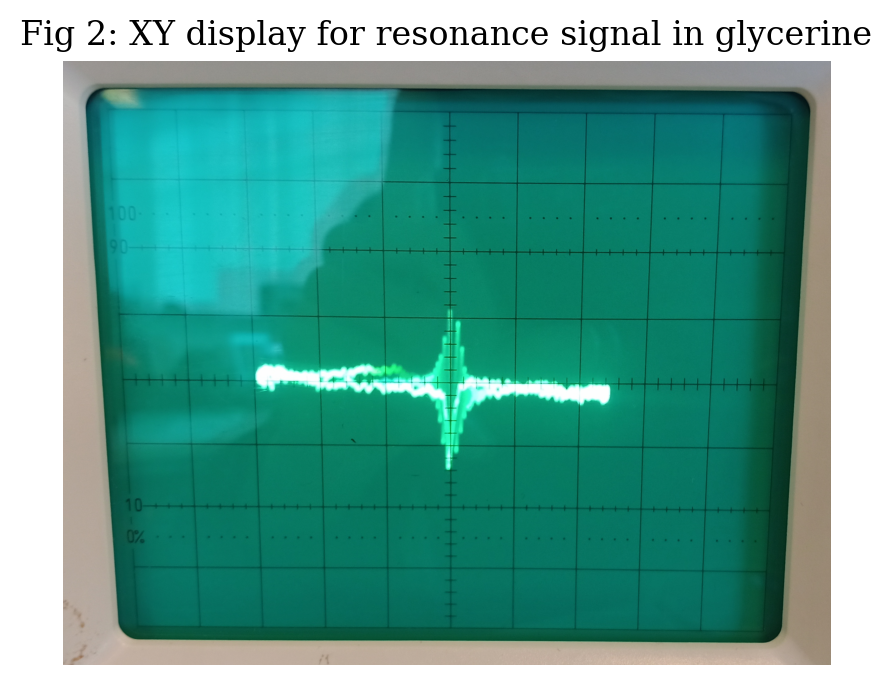

In [4]:
Glycerine_2channels = plt.imread('Glycerine_XY.png')
plt.figure(figsize=(6,4))  # Sets the size of the displayed image
plt.imshow(Glycerine_2channels)
plt.axis('off')
plt.title('Fig 2: XY display for resonance signal in glycerine')
plt.show()

Alzbeta did the same thing for the other elements, and noticed that the NMR signal was a lot weaker for PTFE and polythene, and that the signal for PTFE was at a different frequency and current altogether.

### Results

We then obtain the resonance frequency as a function of current and voltage for Glycerine, polystyrene, PTFE and polythene in the following table.

 element   | current (A) | voltage (V) | resonant frequency (MHz)
:---------:|:-----------:|:-----------:|:-----------------------:
glycerine  | 3.199       | 7.450       | 17.7378
PTFE       | 3.193       | 7.580       | 16.8705
Polystyrene| 3.206       | 7.670       | 17.8593
Polythene  | 3.205       | 7.670       | 17.8781

Even though the errors were not estimated here, we notice that the resonant frequency of PTFE is different from the rest, being $\approx 1 \mathrm{MHz}$ lower at $17 \mathrm{MHz}$, while the rest are at $18 \mathrm{MHz}$. We were given the molecular formula for glycerine and polystyrene (respectively $\ce{C3H5(OH)3}$ and $\ce{(C8H8)_{n}}$). So their resonance frequency would correspond to $\ce{^{1}H}$, as this is the only nucleus which actually has a spin (ie an odd number of nucleons). As the resonant frequency for polythene is similar, I predict that it would come from $\ce{^{1}H}$, and as the one PTFE is appreciably different, it most likely comes from $\ce{^{19}F}$. 

From wikipedia, the molecular formula for PTFE or Polytetrafluoroethylene (which is a dead giveaway) is $\ce{(C2F4)_{n}}$ and the one for polythene is $\ce{(C2H4)_{n}}$, which confirms the previous conclusions.

## (Small) discussion

There is a small change in the current throughout the measurements the measurement. This was not predicted to change the magnetic field so much that the resonance frequencies would be appreciably difference. As we can see thrughout our measurements. No error analysis was done here, but the error were not so big as to change our conclusions.

# Determination of the g-factor of protons and fluorine

## Objective

Here, we are looking to find the g-factor the $\ce{^1 H}$ and $\ce{^{19} F}$ nuclei by finding the magnetic field for a given resonant frequency, and using equation (11) in the lab script.

## Experimental method

### Experimental set-up

We use the same set-up as in part 1 of NMR.

### Calibration

We still don't know to what magnetic field the current corresponds to. This means we need to calibrate, i.e. find how to go from current to magnetic field. 

To calibrate the coils, we took measurements of the magnetic field inside the electromagnet for current increasing from $3$ to $4 \mathrm{A}$ and current decreasing from $4$ to $3\mathrm{A}$ using a hall probe.

The two sets of measurements should be different as the soft iron used in the electromagnet is a ferromagnet, which means it is an anisotrope, ie we expect hysteresis.

We estimate that the absolute error on $B$, the measured magnetic field, to be $2 \, \mathrm{mT}$, and the absolute error on $I$, the measured current, to be $0.002 \, \mathrm{A}$. This is because during the measurement, $I$ and $B$ would deviate by about that much.

First plotting magnetic field against current for both measurements.

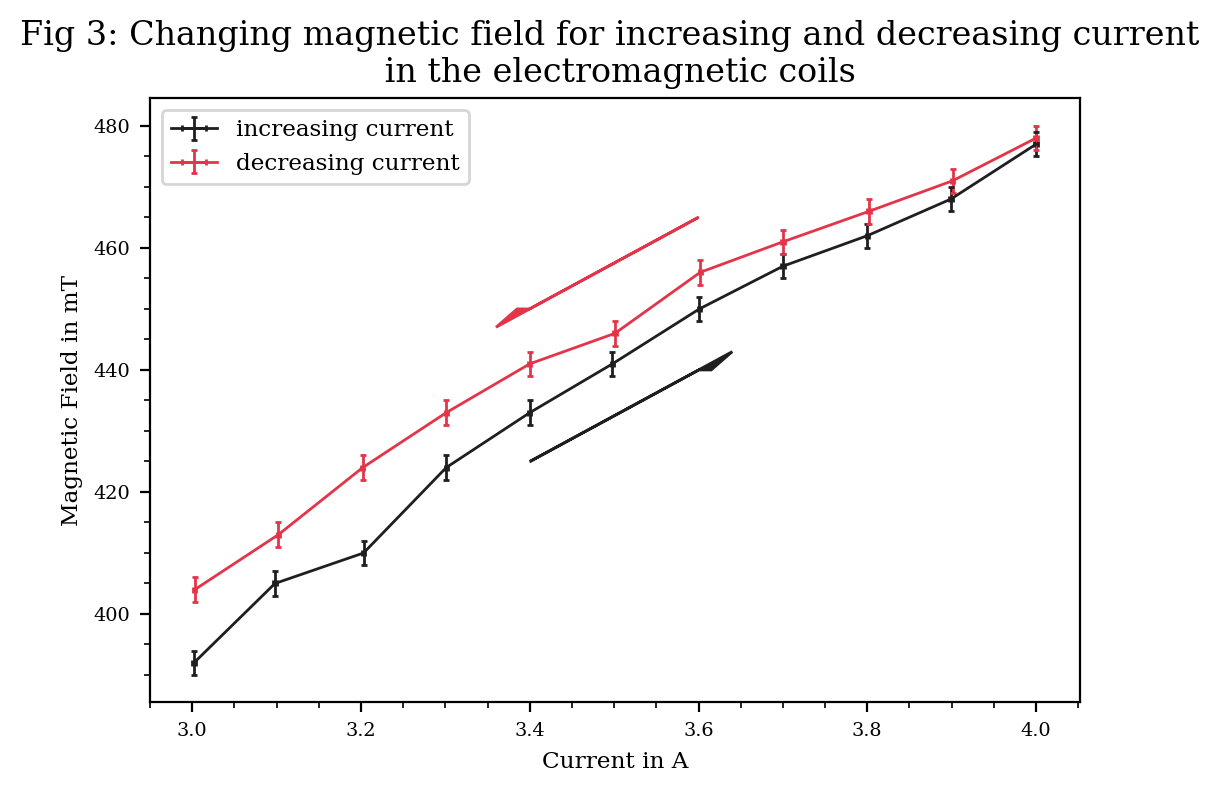

In [5]:
#loading measurements for increasing current:

I1, B1 = np.loadtxt('Calibration_3to4A.csv', delimiter = ';', skiprows=1, unpack = True)

#loading measurements for increasing current:

I2, B2 = np.loadtxt('Calibration_4to3A.csv', delimiter = ';', skiprows=1, unpack = True)

#errors
err_I = 0.002 #A
err_B = 2     #mT

#Plotting

plt.errorbar(I1, B1, xerr = np.ones_like(I1)*err_I, yerr = np.ones_like(B1)*err_B, label = 'increasing current')
plt.arrow(x=3.4, y=425, dx=0.2, dy=15, width = 0.001, head_width = 0.03, head_length = 3, shape = 'left', color = '#1F1F1F') 

plt.errorbar(I2, B2, xerr = np.ones_like(I2)*err_I, yerr = np.ones_like(B2)*err_B, label = 'decreasing current')
plt.arrow(x=3.6, y=465, dx=-0.2, dy=-15, width = 0.001, head_width = 0.03, head_length = 3, shape = 'left', color = '#E43449')

plt.xlabel('Current in A')
plt.ylabel('Magnetic Field in mT')
plt.title('Fig 3: Changing magnetic field for increasing and decreasing current \n in the electromagnetic coils')

plt.legend()
plt.savefig('NMR_graph-BvA.pdf')
plt.show()

In figure 3, although one could argue that the curves are approximately the same towards higher currents (as they are less than 2 standard deviations away from each other), it is clearly not the case towards lower wavelength, as the two curves diverge. This means that the relation is anisotropic, as the magnetic field for a given current depends on the history of the current. As we increase the magnetising force (ie the current), the flux density (ie the magnetic field) increase too. As we decrease the magnetising force, the flux density also decrease, but slower, as the ferromagnet retains some flux lines. However, the two curves are still quite tight, which means our magnet does not retain much magnetism, which is what we want here.

Note that we are close to the point of saturation here, as the two lines seem to touch at higher currents in figure 3.

We want to fit power series through **increasing** current. This is because any continuous function can be approximated by a power series expansion (Taylor approximation). Because I don't know what degree of polynomial would fit best, I'll try to fit the function for an inceasing degree number, and see what the fit looks like. I'll then define another function for the polynomial I chose for the fit (this is because `curve_fit` does not like having a free parameter for the degree and can't calculate the covariance matrix, so, to make it fixed, I have to redefine the function).  I'll also make a plot of the residuals and compare.

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 1 are [  2.         146.25001522  83.37878117]


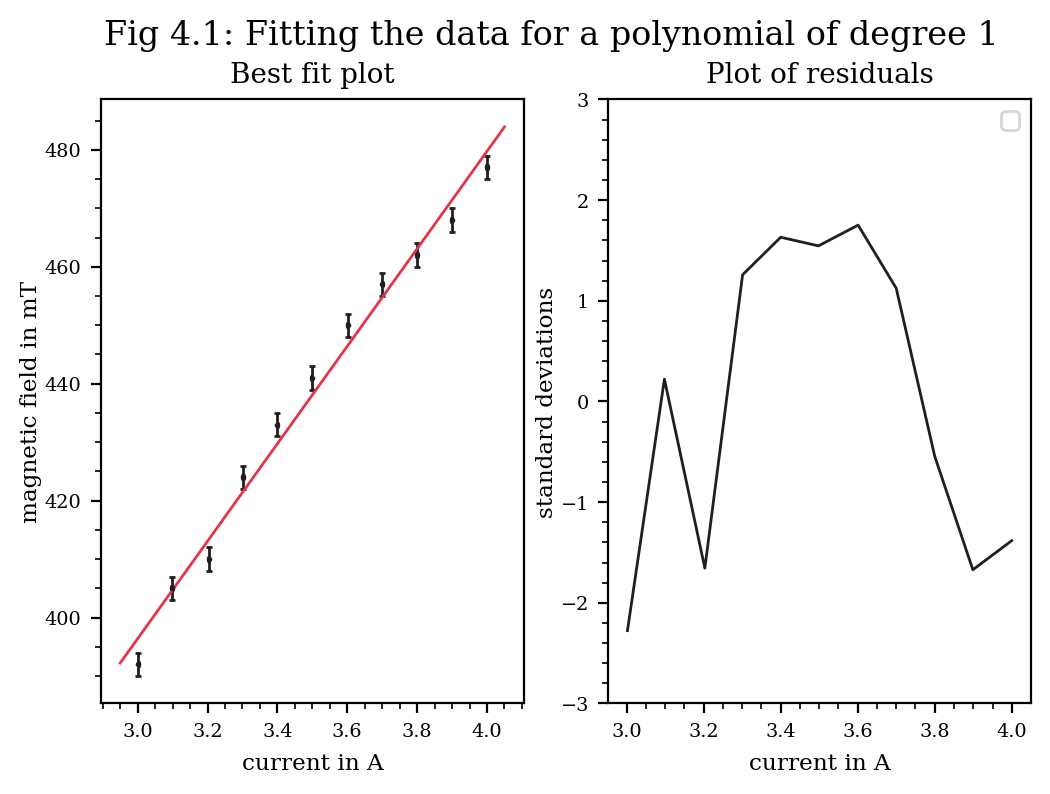

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 2 are [   3.         -197.39820841  281.33967358  -28.2771715 ]


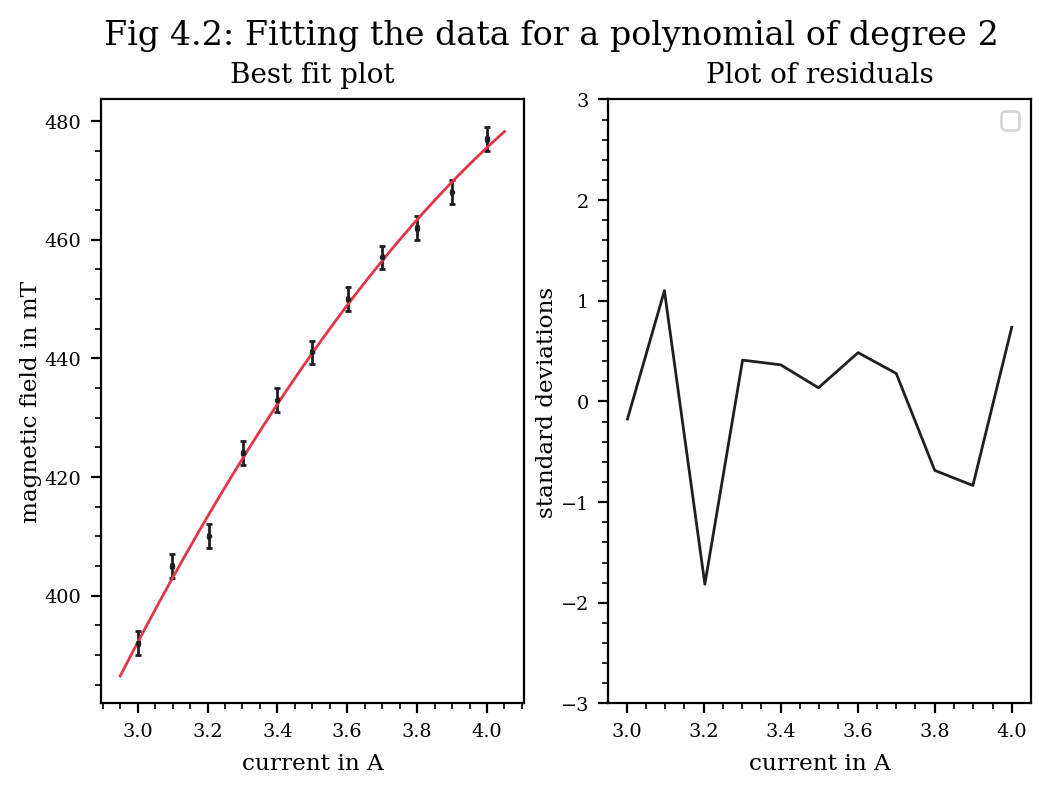

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 3 are [   4.         -438.00659175  489.56901777  -88.05203575    5.69208686]


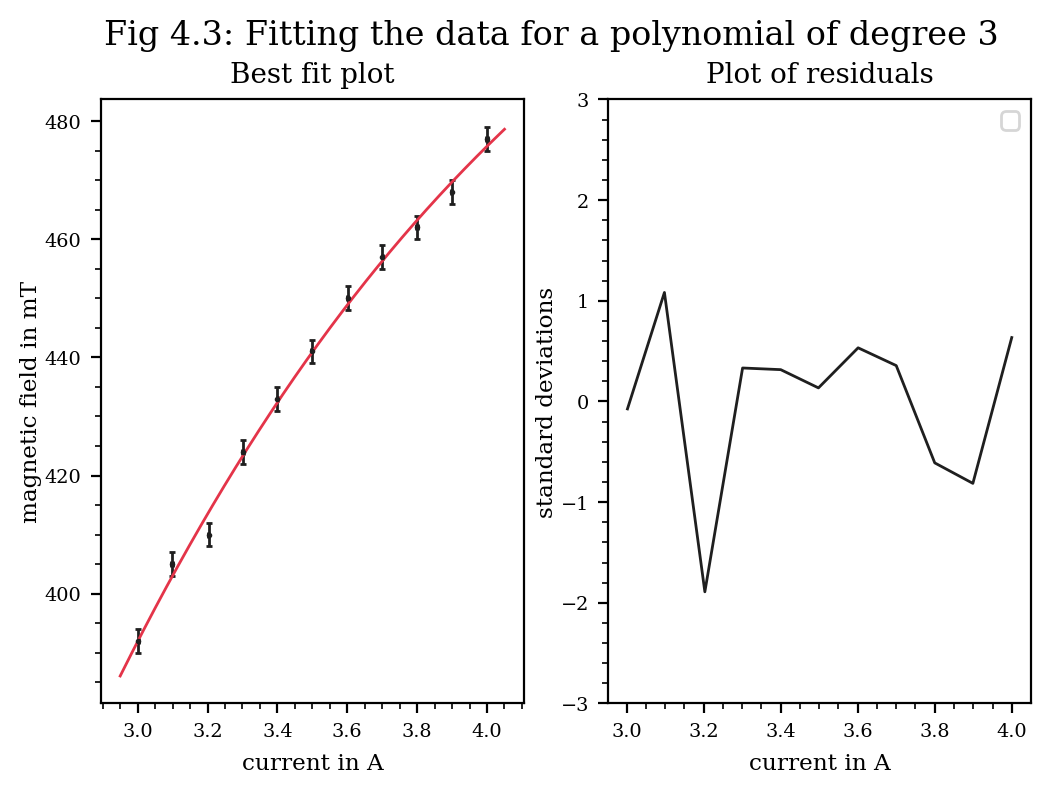

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 4 are [ 5.00000000e+00  1.73834858e+04 -2.00786497e+04  8.78313278e+03
 -1.68901774e+03  1.20994961e+02]


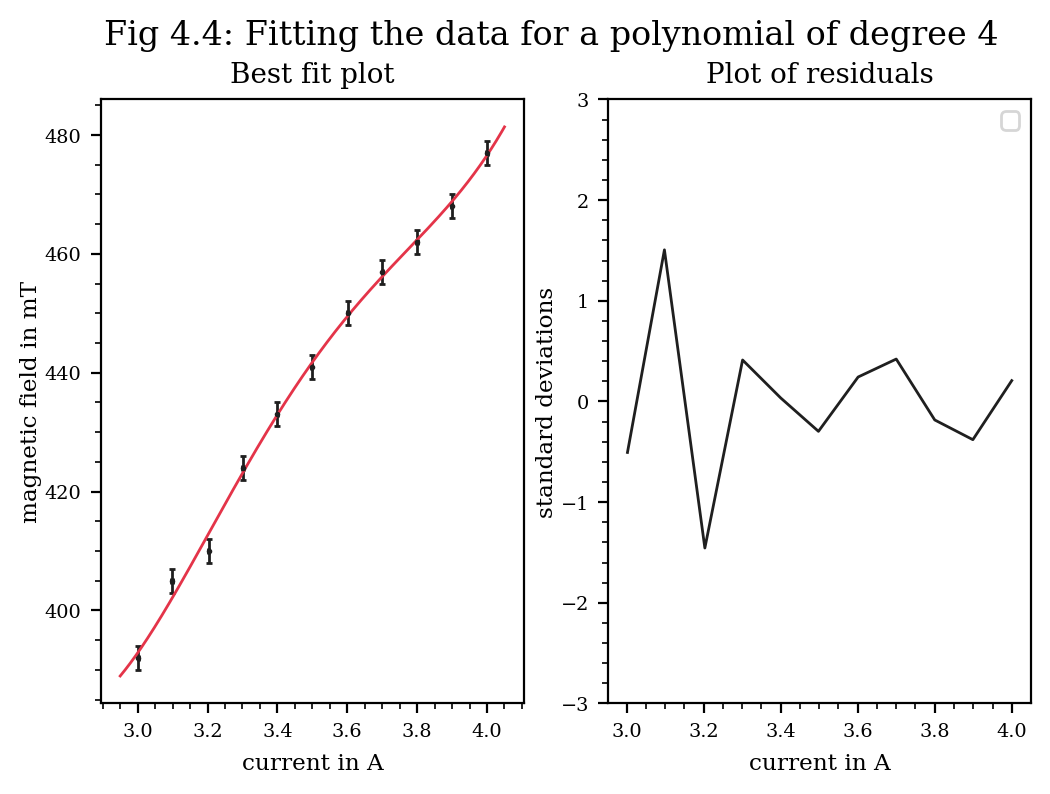

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 5 are [ 6.00000000e+00 -2.01975540e+05  2.96452845e+05 -1.73439625e+05
  5.06260366e+04 -7.36924082e+03  4.27865779e+02]


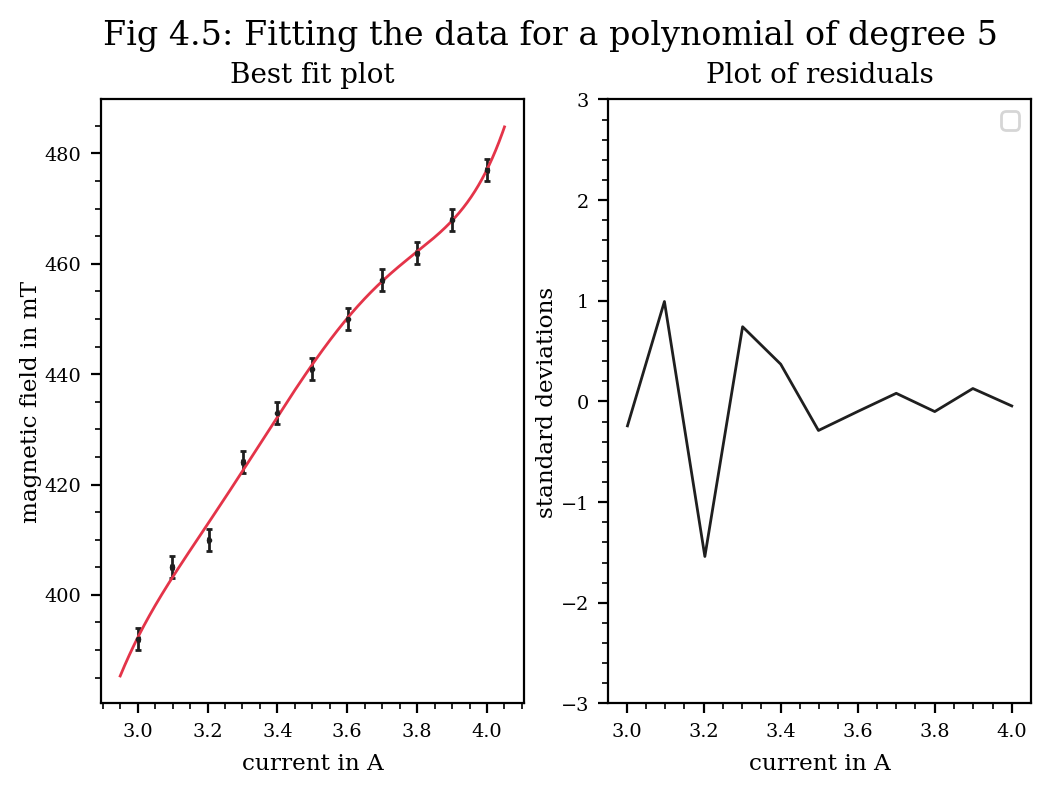

In [6]:
#define power series

def polynomial_function(x, n, *params):
    "polynomial of degree n-1, ie y = a + bx + cx^2 + ... + dx^(n-1)"
    # n-1 is the degree
    # params are the coefficients, from lowest to highest degree of the polynomial
    y = 0
    n = int(n)
    for i in range(n):
        y = params[i]*x**i + y
    return y

#for first 5 polynomials (not doing constant function though)

for i in range(2, 7):
    
    #set best fit parameters (degree of the polynomial and coefficients)
    degree       = np.ones(1)*i
    coefficients = np.ones(i)
    params       = np.concatenate((degree, coefficients))
    
    #do the best fit
    p, pcov = curve_fit(polynomial_function, I1, B1, p0 = params, sigma = err_B*np.ones_like(B1))
    print('best fit parameters for polynomial of degree {0} are'.format(i-1), p)
   
    #residuals
    residual = (B1 - polynomial_function(I1, *p))/err_B*np.ones_like(B1) #in terms of standard deviations of B-term
    
    #plotting with subplots
        #best fit
    I = np.linspace(2.95, 4.05, 1000) #dummy current
    
    ax1 = plt.subplot(1, 2, 1)
    plt.errorbar(I1, B1, xerr = err_I*np.ones_like(I1), yerr = err_B*np.ones_like(B1), fmt = '.', label = 'measured data')
    plt.plot(I, polynomial_function(I, *p), label = 'best fit')
    
    plt.xlabel('current in A')
    plt.ylabel('magnetic field in mT', labelpad=1)
    plt.title('Best fit plot', fontsize = 10)
    
        #residuals
    
    ax2 = plt.subplot(1, 2, 2)
    plt.plot(I1, residual)
    
    plt.xlabel('current in A')
    plt.ylabel('standard deviations', labelpad=1)
    plt.title('Plot of residuals', fontsize = 10)
    plt.ylim(-3, 3)
    
    plt.suptitle('Fig 4.{0}: Fitting the data for a polynomial of degree {0}'.format(i-1))
    plt.legend()
    plt.savefig('NMR_data-fitting-test' + format(i-1) + 'polynomial.pdf')
    plt.show()

In figure 4, we see that all of these fits look ok for the data, as they all fall within the ballpark values of 3 standard deviations away (see corresponding plots of the residuals). This means we have to argue about what happens physically. We can't really choose a straight line fit, as it would negate the fact that we have visible hysteresis going on for our data range. Further, we can't chose a polynomial of high degree because it starts fitting the noise in our data (the curve 'wiggles' which does not represent anything physical, just the variance in our data, as we see in figure 4.4 and 4.5). That's why chosing a fit of degree 3 is probably the best solution. Notice that the plots of both the residuals and the best fit for degrees 2 and 3 are very similar, which means we could also have chosen a polynomial of degree 2 for our fit.

For the fit, I'm not going to use a least-squares fit, but an orthogonal distance regression, which will allow the fit to account for the error in the current values (independent variable). Also, `scipy.odr` has a function for a polynomial model, `odr.polynomial(order)` which I'm going to use.

running the fit:
Beta: [-443.55634499  494.31611489  -89.39942229    5.81901054]
Beta Std Error: [1070.85852038  925.13180243  265.28502506   25.25146852]
Beta Covariance: [[ 1.18551158e+06 -1.02383730e+06  2.93295885e+05 -2.78721164e+04]
 [-1.02383730e+06  8.84807569e+05 -2.53637622e+05  2.41191504e+04]
 [ 2.93295885e+05 -2.53637622e+05  7.27557093e+04 -6.92308995e+03]
 [-2.78721164e+04  2.41191504e+04 -6.92308995e+03  6.59196492e+02]]
Residual Variance: 0.9672937730348018
Inverse Condition #: 3.043455945008479e-05
Reason(s) for Halting:
  Sum of squares convergence


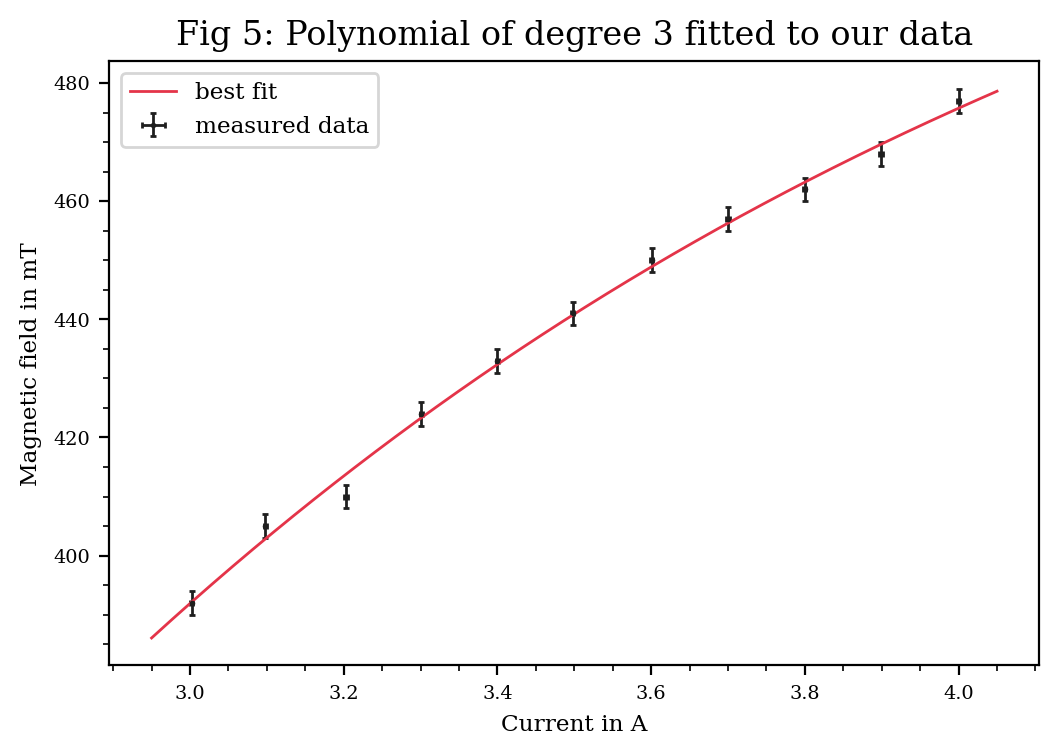

In [7]:
#doing the odr fit:

#defining third degree polynomial model
poly_model = odr.polynomial(3)

#Create RealData object with our measurements
mydata = odr.RealData(I1, B1, sx = err_I, sy = err_B)

# Set up ODR with the model and data.
myodr = odr.ODR(mydata, poly_model, beta0 = [-444., 494., -89., 5.8]) #initial guesses from previous ballpark fits

# Run the regression
myoutput = myodr.run()

# Use the in-built pprint method to give us results.
print('running the fit:')
myoutput.pprint()

#define arrays for parameters
calibration_params = myoutput.beta
calibration_errors = myoutput.sd_beta

#plot the best fit graph
plt.errorbar(I1, B1, xerr = err_I*np.ones_like(I1), yerr = err_B*np.ones_like(B1), fmt = '.', label = 'measured data')
plt.plot(I, polynomial_function(I, 4, *calibration_params), label = 'best fit')

plt.ylabel('Magnetic field in mT')
plt.xlabel('Current in A')
plt.title('Fig 5: Polynomial of degree 3 fitted to our data')

plt.legend()
plt.savefig('NMR_calibration-curve.pdf')
plt.show()

The errors here are enormous (1 order of magnitude larger than the actual (absolute) values). I tried fitting the data using another fitting function, `optimize.curve_fit`, but I get approximately the same thing.

The big standard errors may be because our data is ill-conditioned. In that case, the solution would be to find a conditioning matrix and transform our data into a well-conditioned dataset. In any case, I don't have the time or the mathematical skills to sort it out. We see that all our data points are about half a standard deviation away in the y-axis, so I estimate that the overall error is $1 \mathrm{mT}$ (also see the plot of residuals in fig 4.3).

The equation for the calibration is then:

$$B = (-444 + 494 I -89 I^2 + 6 I^3) \pm 1 \, \mathrm{mT}$$

In [8]:
calibration_error = 1 #mT

### determining g-factor of H-1 and F-19

We want a range of values of resonant frequencies against current for both H-1 and F-19 (within the range 16-19 MHz). We use the same method as part 1 for glycerine (the strongest H-1 signal) and PTFE (the only F-19 sample).

We want to determine the g-factor for both nuclides. To do this we'll fit a straight line through the graph of frequency $\nu$ against magnetic field $B_0$ to find the slope, as these are proportional (eq 11 in lab script). We'll then be able to calculate the g-factor from

$$g = \frac{h}{\mu_n} \frac{\nu}{B_0}$$

as we know both $h$ and $\mu_n = \frac{e \hbar}{2m_p}$, and assuming the mass of the neutron is approximately the mass of the proton, $m_p$. We use the constants provided by `scipy` here.

The absolute error on the frequency was estimated to be $0.0020 \mathrm{MHz}$ as this is the estimated 'wobbliness' when the frequency was changed.

running the fit:
Beta: [0.03705507 2.6582855 ]
Beta Std Error: [0.00067867 0.27642839]
Beta Covariance: [[ 2.97288830e-07 -1.20877078e-04]
 [-1.20877078e-04  4.93205269e-02]]
Residual Variance: 1.549307377807079
Inverse Condition #: 0.0001447090675106636
Reason(s) for Halting:
  Sum of squares convergence

This means the best fit line is nu = (0.0371 pm 0.0007)*B + (2.7 pm 0.3) for Glycerine


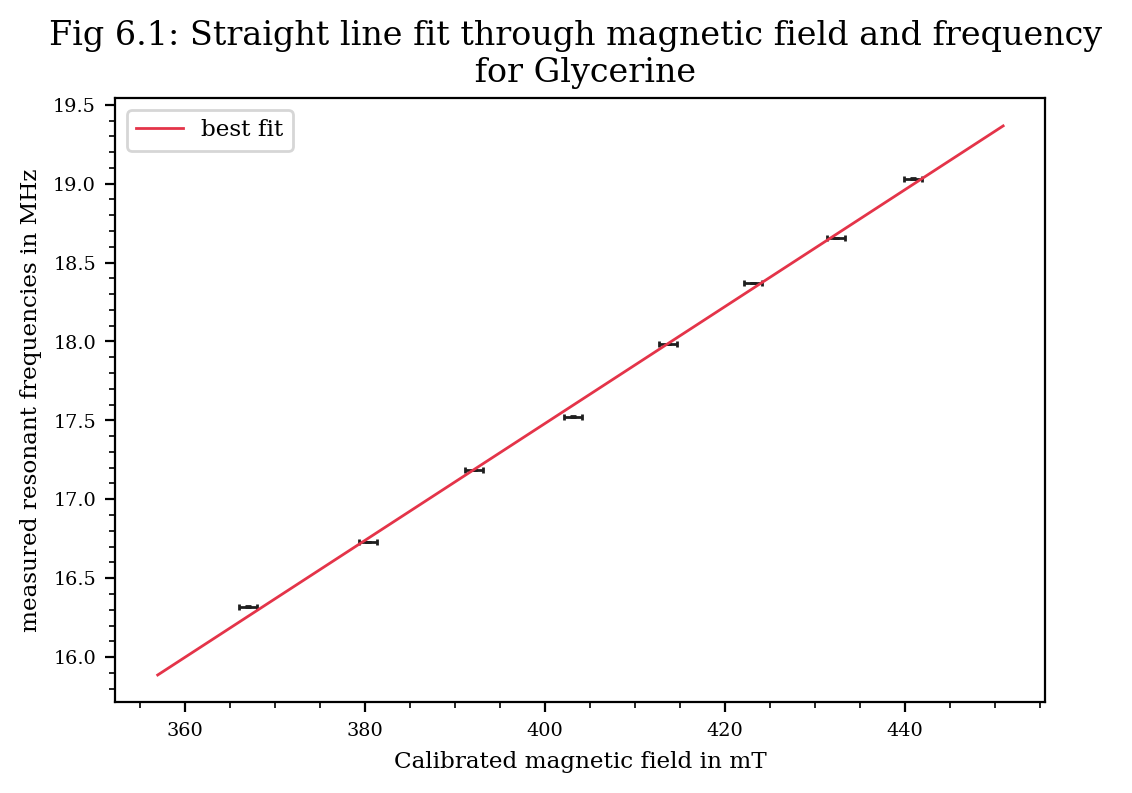

running the fit:
Beta: [0.03815008 1.02739972]
Beta Std Error: [0.00033096 0.14418922]
Beta Covariance: [[ 4.71885056e-07 -2.05375145e-04]
 [-2.05375145e-04  8.95663786e-02]]
Residual Variance: 0.23212427732135762
Inverse Condition #: 0.00010336415992665784
Reason(s) for Halting:
  Sum of squares convergence

This means the best fit line is nu = (0.0382 pm 0.0003)*B + (1.0 pm 0.1) for PTFE


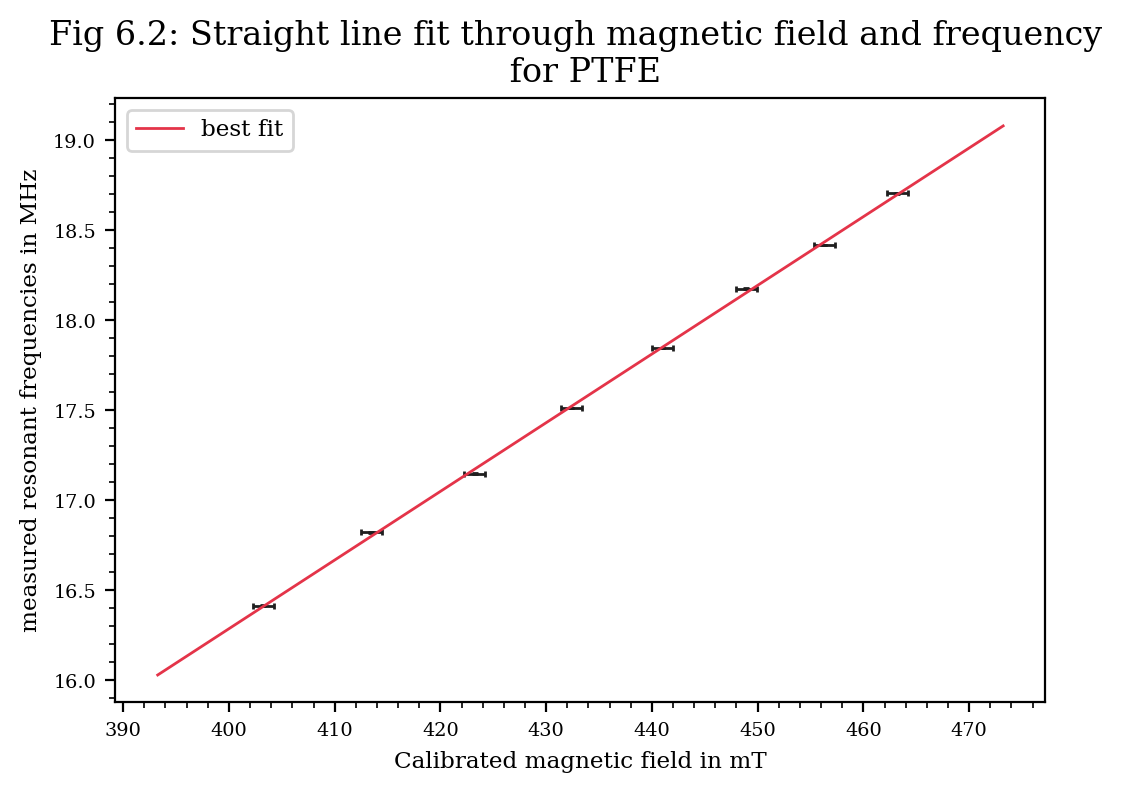

In [9]:
#setting up
file_names = ['Glycerine', 'PTFE'] #sample names
gradients  = []                    #empty array for nu/B
egradients = []                    #corresponding absolute error
offsets    = []                    #empty array for offsets
nue = 0.0020                       #MHz, error on frequency

#making a loop over these names

for f, file in enumerate(file_names):
    #loading data
    current, frequency = np.loadtxt(file + '.csv', delimiter = ';', skiprows=1, unpack = True)
    
    #arrays for calibrated magnitude
    B_values     = []
    
    for i, C in enumerate(current):
        #calibrating the data
        mag = polynomial_function(C, 4, *calibration_params) #degree 3
        B_values.append(mag)
    
    #fitting the function using odr with a linear fit
    
       #Create RealData object with our measurements
    dat = odr.RealData(B_values, frequency, sx = calibration_error, sy = nue)

        # Set up ODR with the model and data.
    fit = odr.ODR(dat, odr.unilinear, beta0 = [1, 1]) #initial guesses to update

        # Run the regression
    out = fit.run()

        # Use the in-built pprint method to give us results.
    print('running the fit:')
    out.pprint()
    
        #define arrays for parameters
    slope, increment         = out.beta
    err_slope, err_increment = out.sd_beta
    
    gradients.append(slope)
    egradients.append(err_slope)
    offsets.append(increment)
    
    print('')
    print('This means the best fit line is nu = ({0:.4f} pm {1:.4f})*B + ({2:.1f} pm {3:.1f}) for {4}'.format(slope, err_slope, increment, err_increment, file))
    
    #plot
    
    dummy_B = np.linspace(min(B_values)-10, max(B_values)+10)
    plt.errorbar(B_values, frequency, fmt = 'none', xerr = calibration_error, yerr = nue)
    plt.plot(dummy_B, slope * dummy_B + increment, label = 'best fit')
    plt.xlabel('Calibrated magnetic field in mT')
    plt.ylabel('measured resonant frequencies in MHz')
    plt.title('Fig 6.{0}: Straight line fit through magnetic field and frequency \n for {1}'.format(f+1, file))
    plt.legend()
    plt.savefig('NMR_frequency-slope_' + file +'.pdf')
    plt.show()


Note that the calibration is indeed valid over this range of $B_0$ values as the range of our calibration is $B_0 \in [390, 480] \, \mathrm{mT}$.
Also notice that there is a significant y-offset for both elements, $\sim 10 \%$ of the actual y value. This is most likely due to an unforeseen systematic error, as we can see that the curve fits well in figure 6. Forcing the function to not have an offset (i.e. setting the function to be $y=mx$) would actually worsen the fit, and not actually make sense physically. This is why including the offset into the error for the slope might be a good idea. Taking the function $y = mx + c$, this would mean saying

$$\frac{y}{x} = m \pm \sigma(m) + \frac{c}{<x>}$$

so $\sigma(m) + \frac{c}{<x>}$ is the positive error, and $- \sigma(m)$ is the negative error on the slope, where $<x>$ is the average of $x$ values. In our case

In [10]:
av_B = np.average(B_values) #calculating average value

#positive errors
pose = egradients + offsets/av_B

#negative errors
nege = egradients

print('So nu/B for glycerine is {0:.4f} + {1:.2g} - {2:.1g} MHZ/mT'.format(gradients[0], pose[0], nege[0]))
print('And nu/B for PTFE is {0:.4f} + {1:.2g} - {2:.1g} MHZ/mT'.format(gradients[1], pose[1], nege[1]))

So nu/B for glycerine is 0.0371 + 0.0068 - 0.0007 MHZ/mT
And nu/B for PTFE is 0.0382 + 0.0027 - 0.0003 MHZ/mT


We can now calculate the g-factors for each of these, noting that

$$\mu_n = \frac{e \hbar}{2m_p}$$

All of these were imported in the preambule.

In [11]:
#calculating nuclear magneton
mu_n = (e*hbar)/(2*m_p)

#converting slopes into SI units
grad     = 1e9*np.array(gradients)  #1/T.s
eposgrad = 1e9*np.array(pose)       #1/T.s
eneggrad = 1e9*np.array(nege)

#calculating g factor for glycerine (H) and PTFE (F)
g_H, g_F           = (h/mu_n)*grad
eposg_H, eposg_F   = (h/mu_n)*eposgrad #assuming no error on the h and mu_n (which is true to the precision of this experiment)
eneg_g_H, eneg_g_F = (h/mu_n)*eneggrad

print('the g-factor for H-1 is then {0:.2f} + {1:.2g} - {2:.1g}'.format(g_H, eposg_H, eneg_g_H))
print('the g-factor for F-19 is then {0:.2f} + {1:.2g} - {2:.1g}'.format(g_F, eposg_F, eneg_g_F))

the g-factor for H-1 is then 4.86 + 0.89 - 0.09
the g-factor for F-19 is then 5.00 + 0.35 - 0.04


Note that the g-factor is a proportionality constant, and is therefore dimentionless.

## Results

Finally, we get that the g-factor for $\ce{^{1} H}$ is

$$g_s = 4.86^{+0.89}_{-0.09}$$

The difference between the upper boundary and the experimental value is $18 \%$, which is quite big, and probably comes from an unforseen systematic error. 

The g-factor for $^{19} F$ is

$$g_s = 5.00^{+0.35}_{-0.04}$$

The difference between the upper boundary and the experimental value is lower, at $7 \%$.

# Discussion and Conclusion

## Comparision with literature values

The value in https://www.ld-didactic.de/literatur/hb/e/p6/p6531_e.pdf is $5.5857$, which is within our upper error boundaries for our measured value of $4.86^{+0.89}_{-0.09}$ (the two values are consistent). However, there is a $-12.9 \%$ difference between the two, which is significant. This most likely comes from the systematic error which resulted in the y-offset in the linear fit between frequency and corresponding magnetic field strength.

From the same paper, the literature value for $^{19} F$ is $5.2567$. Our result, $5.00^{+0.35}_{-0.04}$, is consistent with this value. The percentage difference is significantly lower ($5 \%$) than for $^{1} H$. This is most likely due to the fact that the y-offset was smaller, and so the systematic error is smaller. This error may be dependent on the material.

## Asymetricity of the error bounds for our g-factor

As mentioned before, there is possibly a systematic error which leads to an underestimation of our measured g-factor for both samples. I thought it may have been caused by the possibility that the hysteresis loop was not completed between the calibration and the different measurements, which would lead the relation between magnetic field and current to be different, as they wouldn't follow the same line on figure 3. So, on day 3, I readid the measurements of the calibration and of PTFE, making sure to bring back the current down to $\sim 0$ between the 2 measurements. The full hysteresis loop is shown in figure 7.

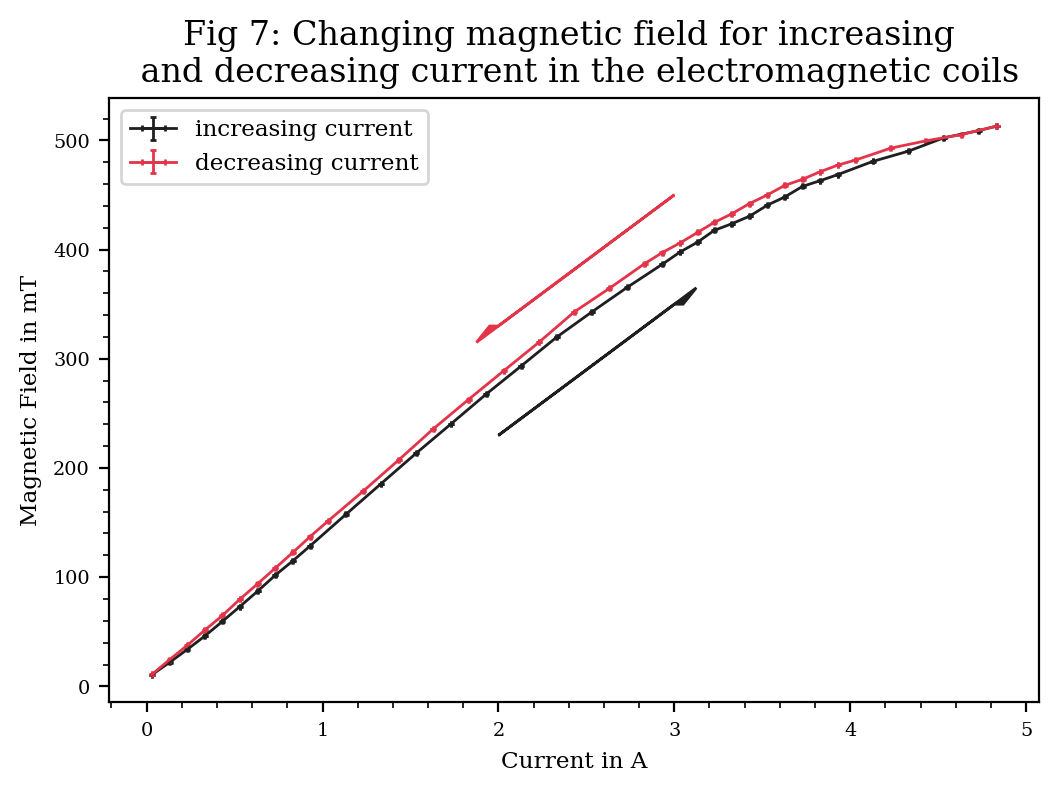

In [12]:
#loading measurements for increasing current:

b1, i1 = np.loadtxt('NMR_calib_up.txt', skiprows=1, unpack = True)

#loading measurements for increasing current:

b2, i2 = np.loadtxt('NMR_calib_down.txt', skiprows=1, unpack = True)

#errors
err_i = 0.002 #A
err_b = 0.2   #mT

#Plotting

plt.errorbar(i1, b1, xerr = np.ones_like(i1)*err_i, yerr = np.ones_like(b1)*err_b, label = 'increasing current')
plt.arrow(x=2, y=230, dx=1, dy=120, width = 0.003, head_width = 0.1, head_length = 15, shape = 'left', color = '#1F1F1F') 

plt.errorbar(i2, b2, xerr = np.ones_like(i2)*err_i, yerr = np.ones_like(b2)*err_b, label = 'decreasing current')
plt.arrow(x=3, y=450, dx=-1, dy=-120, width = 0.003, head_width = 0.1, head_length = 15, shape = 'left', color = '#E43449')

plt.xlabel('Current in A')
plt.ylabel('Magnetic Field in mT')
plt.title('Fig 7: Changing magnetic field for increasing \n and decreasing current in the electromagnetic coils')

plt.legend()
plt.savefig('NMR_graph-BvA2.pdf')
plt.show()

We can clearly see the loop here, with both saturation points. The loop is very tight, as expected for this kind of electromagnet. I then did the same analysis as in part 2 and found that the g-factor equalled $5.61^{+0.07}_{-0.3}$. This is an *overestimate* of our value, and is about as close to the literature value than our other measured g-factor ($7 \%$). Calculating the average of the two:

In [13]:
g_Fav  = np.average([g_F, 5.614509224373659]) # many significant figures avoid rounding errors
g_Fave = sem([g_F, 5.614509224373659])        # calculates the standard error on the mean, imported from scipy

print('The average value of the g-factor of fluorine is {0:.1f} pm {1:.1g}'.format(g_Fav, g_Fave))

The average value of the g-factor of fluorine is 5.3 pm 0.3


This is a lot closer to the literature value (could even argue that they are equal, to the same number of significant figures). I therefore conclude that, contrary to what I've been saying, there's probably no systematic error, and that it's in fact a random error due to our different fits.

## Comparision of the spectra for different samples

All of the signals presented 'wiggles', instead of a clear absorption dip. I think it can be corrected by synchronising the field modulation and RF phases, as described in paragraph IV in this paper https://doi.org/10.1063/1.5127746. We should then obtain a lorentzian, as expected. The 'wiggle' may also be due to the fact that the samples are *not* single atoms, but molecules. This means the energy transition of these nuclei (F for PTFE, H for glycerine, polythene and polystyrene) may be slightly different depending on the nuclei's neighbourhoods. The amplitude may also change.

We also noticed that the signals for polythene and polysterene were a lot dimmer than for glycerine (for the same settings on our equipment), although these were all spectra for the energy transition of $\ce{^1 H}$. This is probably due to the number density of H atoms inside the sample.

Finally, the resonant frequency was slightly different in the 3 samples containing $\ce{^1 H}$, which can also be explained by the fact that they are in different environments.

Note here that, as $\ce{^1 H}$ and $\ce{^{19} F}$ are the most common isotopes for Hydrogen (99.985%) and fluorine (100%, only stable fluorine nucleus) (from wikipedia), our assumtion that all the H and F nuclei undergo the energy transition is valid.

## Applications

NMR spectroscopy can be used to identify different molecules. For example in the following spectrum for polythene taken from https://www.researchgate.net/figure/Fig-S13-1-H-NMR-spectrum-of-polyethylene-obtained-by-using-2b-and-i-Bu-3-Al-listed-in_fig8_40908743.

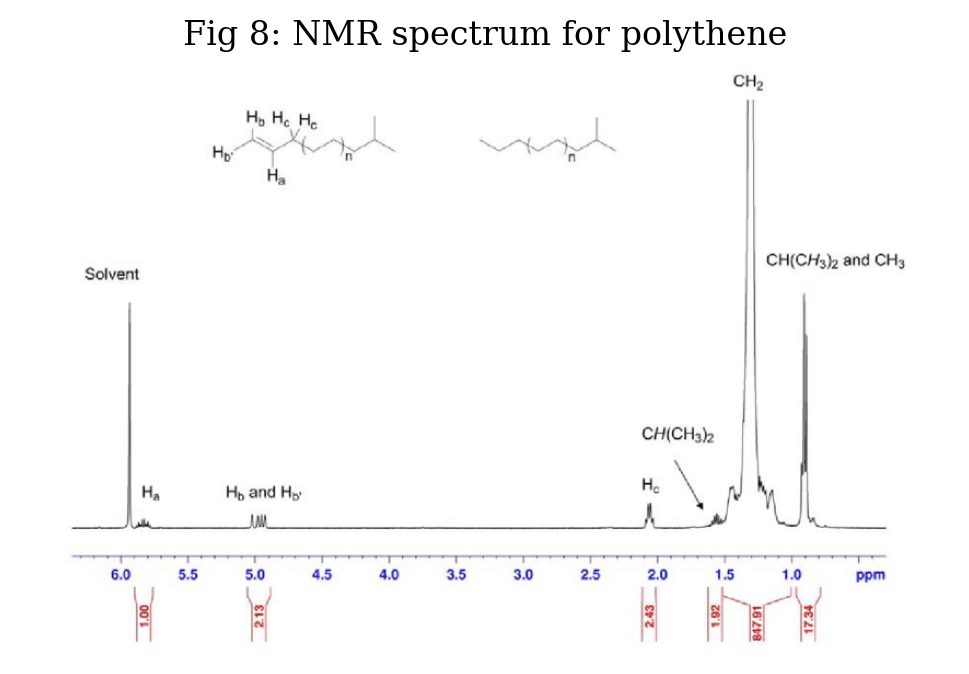

In [14]:
polythene = plt.imread('1-H-NMR-spectrum-of-polyethylene.png')
plt.figure(figsize=(6,4))  # Sets the size of the displayed image
plt.imshow(polythene)
plt.axis('off')
plt.title('Fig 8: NMR spectrum for polythene')
plt.show()

This was obtained by exciting the sample with a radio frequency pulse (instead of continuous such as in our experiement) in a strong magnetic field such that we obtain resonance. Because of the different electric environments of the $\ce{^1 H}$ nuclei inside the sample, as the electrons start moving because of the external magnetic field, which generate local magnetic fields, (very weakly) shifting the magnetic field for a given resonant frequency, which is represented in figure 8, where the shift is in ppm (parts per milion). This shift will then tell us information about the groups present inside of the molecule (eg $\ce{CH3}$, $\ce{CH2}$, or even alcohol $\ce{OH}$), as each peak (for example in fig 8) will represent one. Further, the peaks are split because of J-coupling (interaction of the spin state with the chemical bond). In the case of $\ce{^1 H}$, the peak will be split into 1 + the number of H-atoms in the neighbouring carbohydrate group. A molecule can then be identified by careful examination of the spectrum. (from https://en.wikipedia.org/wiki/Nuclear_magnetic_resonance_spectroscopy)

The principles of NMR are also applied in medical imaging with MRI, wherein the protons in organic molecules react differently to the magnetic field depending on their environment, as described above. From these different responses, we can identify the different tissues in the body. (from https://en.wikipedia.org/wiki/Magnetic_resonance_imaging)